<a href="https://colab.research.google.com/github/vieduy/CS114.K21/blob/master/Predicting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cài đặt và import Turi Create

In [0]:
pip install turicreate

In [0]:
import turicreate

# Load dữ liệu giá nhà (Upload từ drive)

In [0]:
sales = turicreate.SFrame('drive/My Drive/Colab Notebooks/home_data.sframe/')

# Trực quan hóa dữ liệu giá nhà (dạng table)

In [0]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Mô hình hồi quy tuyến tính dùng để dự đoán giá nhà từ diện tích

## Phân chia tập dữ liệu

In [0]:
training_set, test_set = sales.random_split(.8,seed=0)

## Huấn luyện mô hình

In [0]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.003507     | 4352826.669361     | 2193453.257252       | 262902.439456                   | 263727.597107                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## Đánh giá mô hình

### Giá nhà trung bình trên test set

In [0]:
print (test_set['price'].mean())

543054.042563


### Sai số lớn nhất và sai số trung bình khi dự đoán

In [0]:
print (sqft_model.evaluate(test_set))

{'max_error': 4146157.9662598837, 'rmse': 255185.2085252317}


# Mở rộng mô hình

## Giá trị của các hệ số (weight)

In [0]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-46526.7284506,5049.9671952
sqft_living,None,281.634859676,2.2209987218


## Trực quan hóa giá nhà dự đoán và giá nhà thực tế dựa vào diện tích

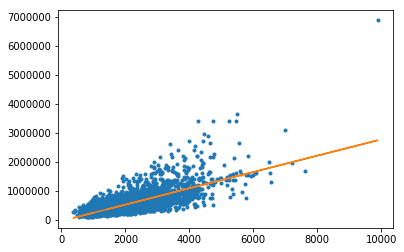

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Khám phá những features của data

## Trực quan hóa giá trị của các features (trục X là value, Y là frequency)

In [0]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [0]:
sales[my_features].show()

Materializing SFrame

In [0]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Xây dựng model với nhiều features hơn

In [0]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.031378     | 4037238.810119     | 1622443.970596       | 189240.447194                   | 189483.746050                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# So sánh khả năng dự đoán giữa hai model trên 

In [0]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [0]:
print ('sqft_model: ',sqft_model.evaluate(test_set))
print ('my_features: ',my_features_model.evaluate(test_set))

('sqft_model: ', {'max_error': 4146157.9662598837, 'rmse': 255185.2085252317})
('my_features: ', {'max_error': 3122001.95641941, 'rmse': 180694.38990442993})


### - Nhận xét: Ta thấy model được train bởi vector có nhiều tính năng đem lại độ chính xác cao hơn

# Áp dụng vào dự đoán thực tế

## Dự đoán giá của một ngôi nhà có id là 5309101200

In [0]:
house1 = sales[sales['id']=='5309101200']

In [0]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [0]:
print (house1['price'])

[620000.0, ... ]


In [0]:
print (sqft_model.predict(house1))

[629396.9347705769]


In [0]:
print (my_features_model.predict(house1))

[732650.5708523148]


## Tương tự với một ngôi nhà khác có id là 1925069082

In [0]:
house2 = sales[sales['id']=='1925069082']

In [0]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

### Kết quả sau khi dự đoán bằng 2 model trên

In [0]:
print (sqft_model.predict(house2))

[1260259.0204437103]


In [0]:
print (my_features_model.predict(house2))

[1237436.425625581]


## Dự đoán giá của một ngôi nhà với đầy đủ 21 features

In [0]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

### Kết quả dự đoán

In [0]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[15168243.902999388]
